# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
from scipy.stats import linregress


# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

#Create Output Path
output_file_path=os.path.join("python-api-challenge", "WeatherPy","output data", "cities.csv")

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 607


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather" 
 

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response=requests.get(city_url)
        city_weather = response.json()
        if city_weather["cod"] != 200:
            print(f"City not found. Skipping... Error:{city_weather['message']}")
            continue

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"] 
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
        print(f"City not found. Skipping... Error: {e}")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | visby
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | berdigestyakh
Processing Record 4 of Set 1 | keflavik
Processing Record 5 of Set 1 | acapulco de juarez
Processing Record 6 of Set 1 | grytviken
Processing Record 7 of Set 1 | wailua homesteads
Processing Record 8 of Set 1 | qaqortoq
Processing Record 9 of Set 1 | isafjordur
Processing Record 10 of Set 1 | iqaluit
Processing Record 11 of Set 1 | stanley
Processing Record 12 of Set 1 | vytegra
Processing Record 13 of Set 1 | tamanrasset
Processing Record 14 of Set 1 | adamstown
Processing Record 15 of Set 1 | ulanhot
Processing Record 16 of Set 1 | cadale
Processing Record 17 of Set 1 | callao
Processing Record 18 of Set 1 | cudillero
Processing Record 19 of Set 1 | tchintabaraden
Processing Record 20 of Set 1 | hawaiian paradise park
Processing Record 21 of Set 1 | bel ombre
Processing Record 22 of Set 1 | misratah
Proce

In [20]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          580
Lat           580
Lng           580
Max Temp      580
Humidity      580
Cloudiness    580
Wind Speed    580
Country       580
Date          580
dtype: int64

In [21]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,visby,57.6409,18.2960,4.12,70,100,6.69,SE,1742259566
1,waitangi,-43.9535,-176.5597,16.48,96,48,9.67,NZ,1742259568
2,berdigestyakh,62.0989,126.6992,-9.69,93,99,2.09,RU,1742259569
3,keflavik,64.0049,-22.5624,7.24,100,100,6.69,IS,1742259570
4,acapulco de juarez,16.8634,-99.8901,23.44,74,0,3.70,MX,1742259571


In [22]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [23]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,visby,57.6409,18.2960,4.12,70,100,6.69,SE,1742259566
1,waitangi,-43.9535,-176.5597,16.48,96,48,9.67,NZ,1742259568
2,berdigestyakh,62.0989,126.6992,-9.69,93,99,2.09,RU,1742259569
3,keflavik,64.0049,-22.5624,7.24,100,100,6.69,IS,1742259570
4,acapulco de juarez,16.8634,-99.8901,23.44,74,0,3.70,MX,1742259571


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

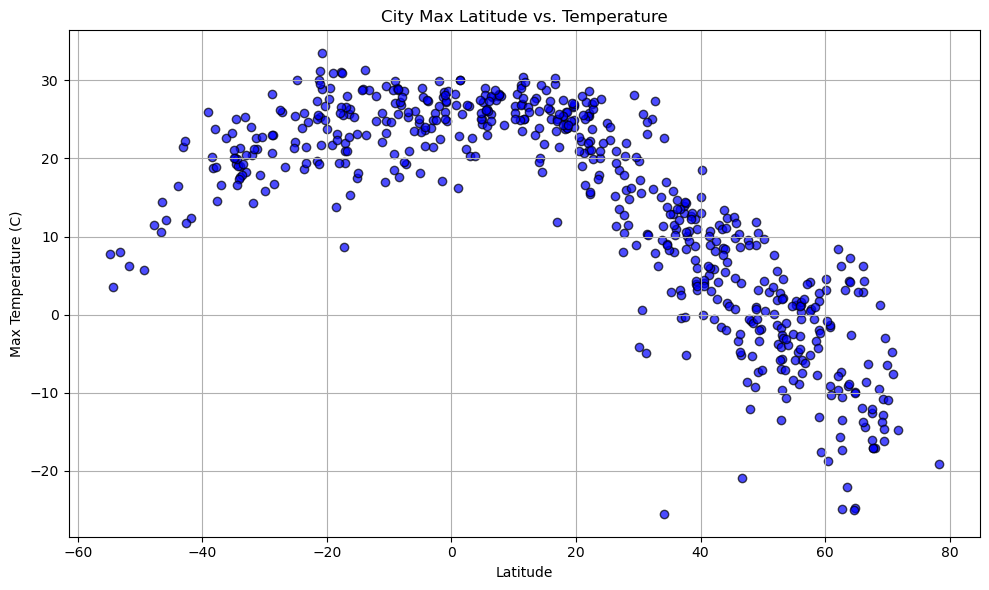

In [24]:
fig_1_output=os.path.join("WeatherPy", "output data", "Fig1.png")
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(10,6))
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], color='b', alpha=0.7, edgecolor='black')

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)
plt.tight_layout()

# Save the figure
plt.savefig("fig_1_output")

# Show plot
plt.show()

#### Latitude Vs. Humidity

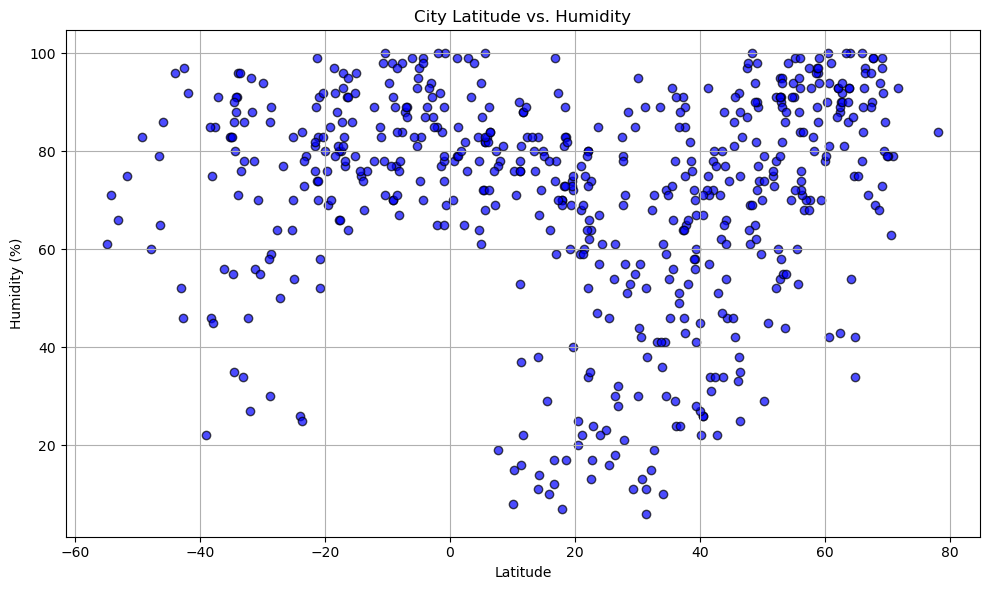

In [25]:
fig_2_output=os.path.join("WeatherPy", "output data", "Fig2.png")
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(10,6))
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], color='b', alpha=0.7, edgecolor='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.tight_layout()
# Save the figure
plt.savefig("fig_2_output")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

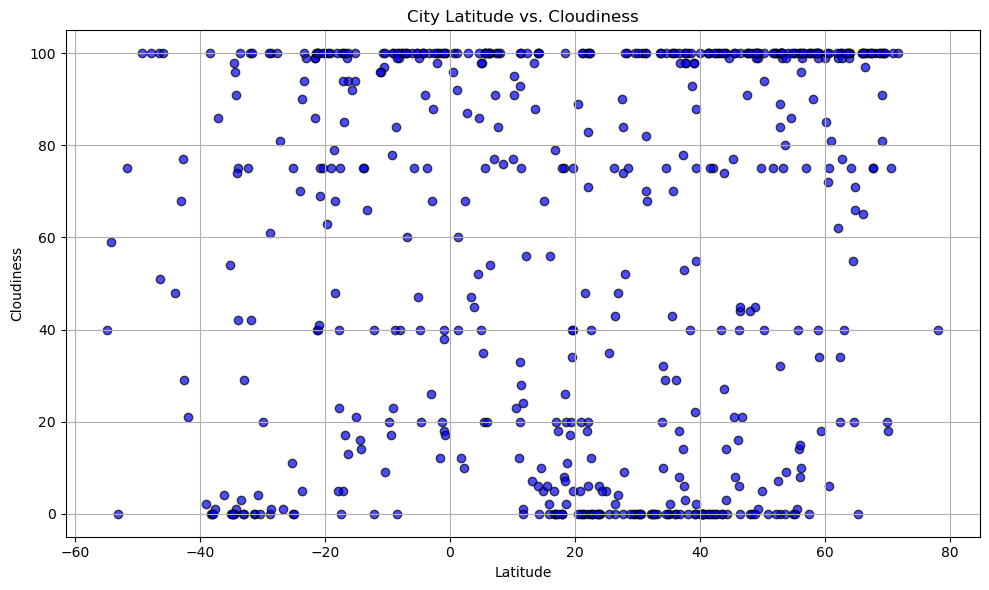

In [26]:
fig_3_output=os.path.join("WeatherPy", "output data", "Fig3.png")
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(10,6))
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], color='b', alpha=0.7, edgecolor='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)
plt.tight_layout()
# Save the figure
plt.savefig("fig_3_output")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

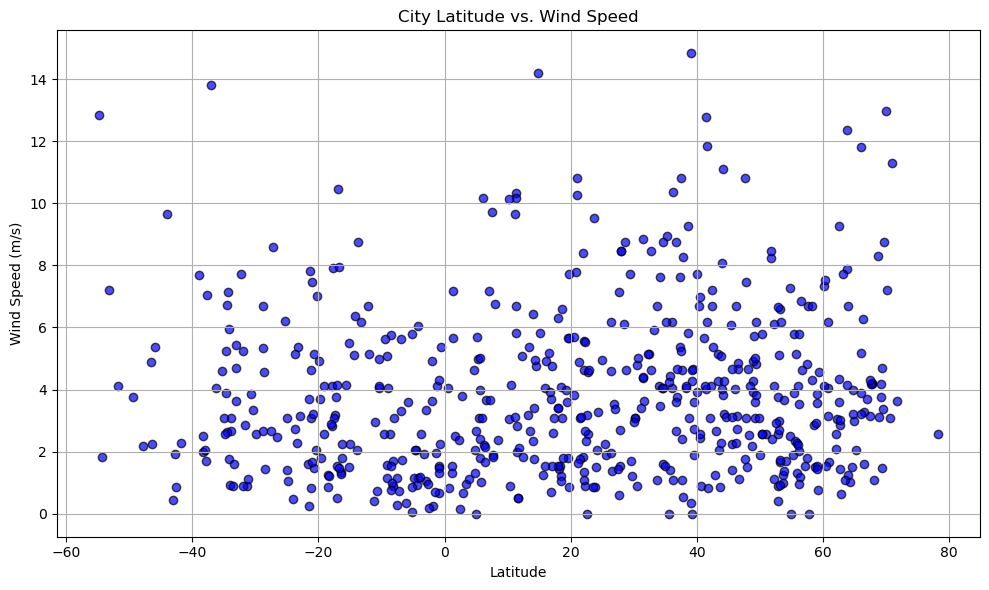

In [27]:
fig_4_output=os.path.join("WeatherPy", "output data", "Fig4.png")
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(10,6))
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], color='b', alpha=0.7, edgecolor='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)
plt.tight_layout()

# Save the figure
plt.savefig("fig_4_output")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [34]:
# Define a function to create Linear Regression plots
def create_linear_regression_plot(x, y, title, xlabel, ylabel, figure_name, fig_size=(10, 6)):
    slope, intercept, r_value, p_value, std_err= linregress(x, y)
    regress_line= x* slope + intercept
    plt.scatter(x,y, color="b", edgecolor="black", alpha=0.7)
    plt.plot(x, regress_line,color='r', label=f'Fit:y={slope:.2f}x+{intercept:.2f}')

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(loc="best")

    output_dir="output data"
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    output_file=os.path.join(output_dir, f"{figure_name}.png")
    plt.savefig(output_file)

    
    plt.show()

    

    print(f"The r^2 value is {r_value}")



In [29]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df= city_data_df[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,visby,57.6409,18.2960,4.12,70,100,6.69,SE,1742259566
2,berdigestyakh,62.0989,126.6992,-9.69,93,99,2.09,RU,1742259569
3,keflavik,64.0049,-22.5624,7.24,100,100,6.69,IS,1742259570
4,acapulco de juarez,16.8634,-99.8901,23.44,74,0,3.70,MX,1742259571
6,wailua homesteads,22.0669,-159.3780,25.44,80,20,4.63,US,1742259574


In [30]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,waitangi,-43.9535,-176.5597,16.48,96,48,9.67,NZ,1742259568
5,grytviken,-54.2811,-36.5092,3.55,71,59,1.82,GS,1742259572
13,adamstown,-25.0660,-130.1015,25.44,70,0,1.41,PN,1742259582
16,callao,-12.0667,-77.1500,24.84,78,0,5.14,PE,1742259585
20,bel ombre,-4.6167,55.4167,27.91,83,20,2.06,SC,1742259590


###  Temperature vs. Latitude Linear Regression Plot

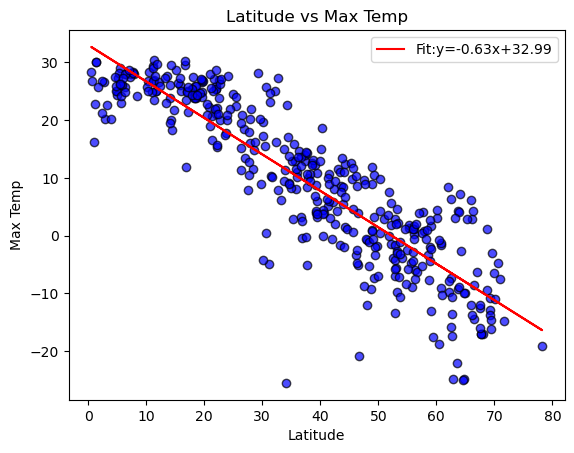

The r^2 value is -0.8880078051013387


In [45]:

# Linear regression on Northern Hemisphere
create_linear_regression_plot(
    northern_hemi_df['Lat'],
    northern_hemi_df['Max Temp'],
    'Latitude vs Max Temp',
    'Latitude',
    'Max Temp',
    "nhemi_latvtemp"
    )


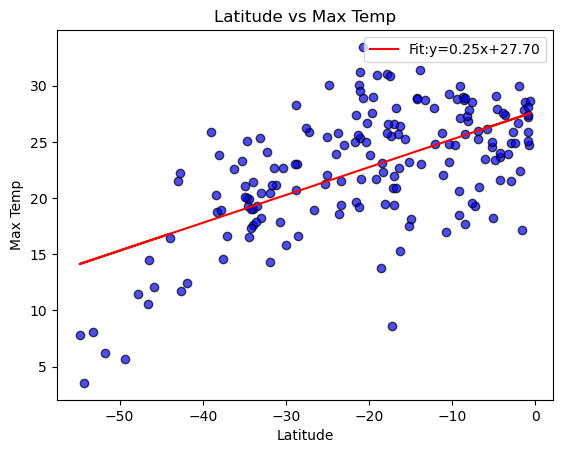

The r^2 value is 0.6099936336527534


In [46]:
# Linear regression on Southern Hemisphere
create_linear_regression_plot(
    southern_hemi_df['Lat'],
    southern_hemi_df['Max Temp'],
    'Latitude vs Max Temp',
    'Latitude',
    'Max Temp',
    "shemi_latvtemp"
    )

**Discussion about the linear relationship:** As expected the northern hemisphere shows a clear connection with colder tempertures the higher the latitude as it is farthest from the equator. The northern Hemisphere has more mountain ranges which impacts tempertures more than any other land structure. The southern hemisphere shows higher temperatures closer to the equator or 0 latitude. 

### Humidity vs. Latitude Linear Regression Plot

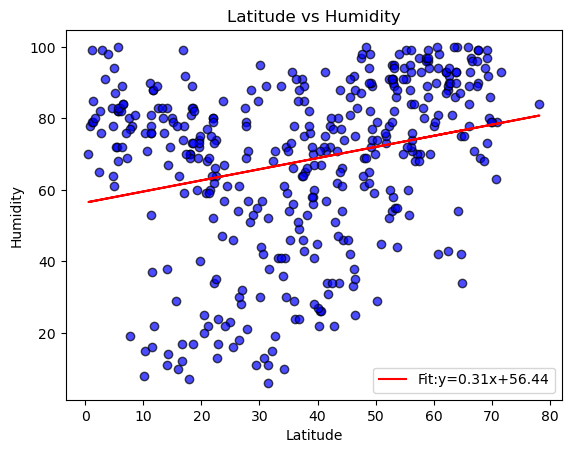

The r^2 value is 0.25642308198367253


In [36]:
# Northern Hemisphere
create_linear_regression_plot(
    northern_hemi_df['Lat'],
    northern_hemi_df['Humidity'],
    'Latitude vs Humidity',
    'Latitude',
    'Humidity',
    "nhemi_humid",
    )

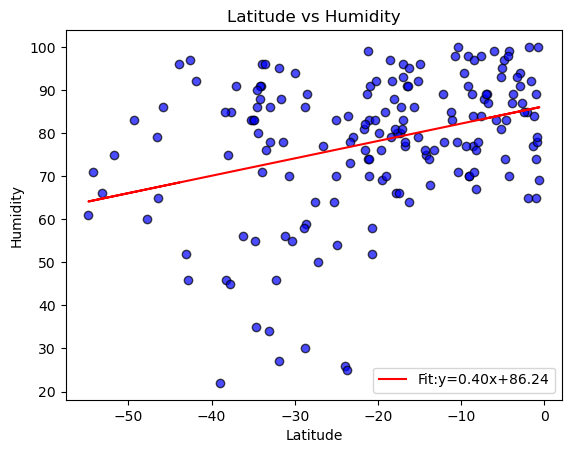

The r^2 value is 0.33602589398515526


In [38]:
# Southern Hemisphere
create_linear_regression_plot(
    southern_hemi_df['Lat'],
    southern_hemi_df['Humidity'],
    'Latitude vs Humidity',
    'Latitude',
    'Humidity',
    "shemi_humid",
    )

**Discussion about the linear relationship:** There is less correlations to make about humidity compared to tempuratures. Both hemispheres have comparable bodies of water that would increase humidities. There is a slight connection between the equator and humiditiy. Most of the equator is water masses, any land masses are surrounded by water which would increase the humidity. 

### Cloudiness vs. Latitude Linear Regression Plot

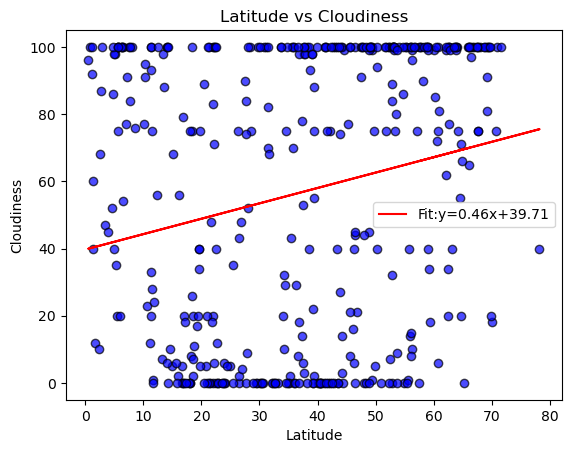

The r^2 value is 0.2121357633539006


In [39]:
# Northern Hemisphere
create_linear_regression_plot(
    northern_hemi_df['Lat'],
    northern_hemi_df['Cloudiness'],
    'Latitude vs Cloudiness',
    'Latitude',
    'Cloudiness',
    "nhemi_cloud",
    )

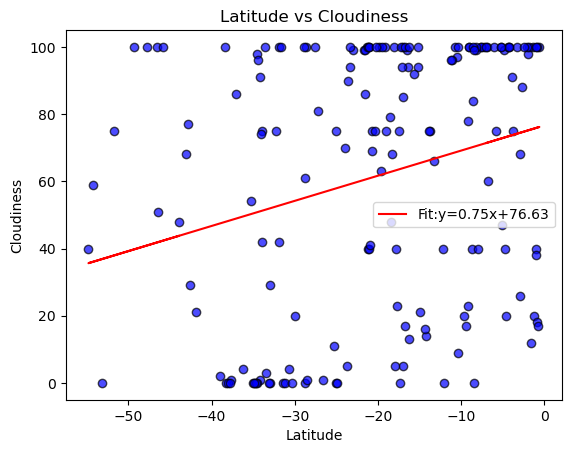

The r^2 value is 0.2580397732349036


In [41]:
# Southern Hemisphere
create_linear_regression_plot(
    southern_hemi_df['Lat'],
    southern_hemi_df['Cloudiness'],
    'Latitude vs Cloudiness',
    'Latitude',
    'Cloudiness',
    "shemi_cloud",
    )

**Discussion about the linear relationship:** There is a fair amount of distrubtion between both hemisphere when considering cloudiness. The nortrhern hemisphere is more dense and suggests more climatic diversity in it's regions as we have instances of 0 clouds and 100 clouds bewtween 10 and 70 latitudes. The southern hemisphere shows more cloudiness towards the equator than further away.

### Wind Speed vs. Latitude Linear Regression Plot

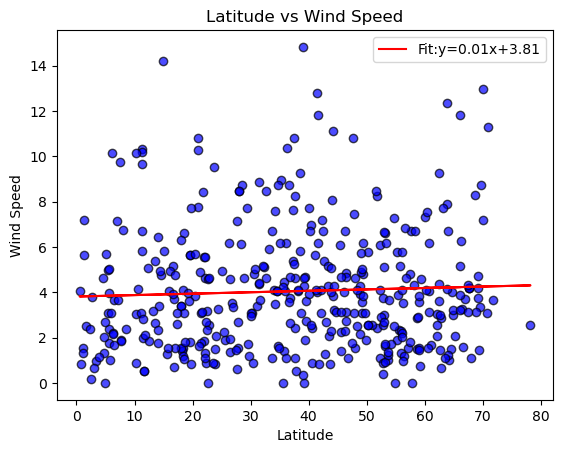

The r^2 value is 0.04534538379313185


In [42]:
# Northern Hemisphere
create_linear_regression_plot(
    northern_hemi_df['Lat'],
    northern_hemi_df['Wind Speed'],
    'Latitude vs Wind Speed',
    'Latitude',
    'Wind Speed',
    "nhemi_wind",
    )

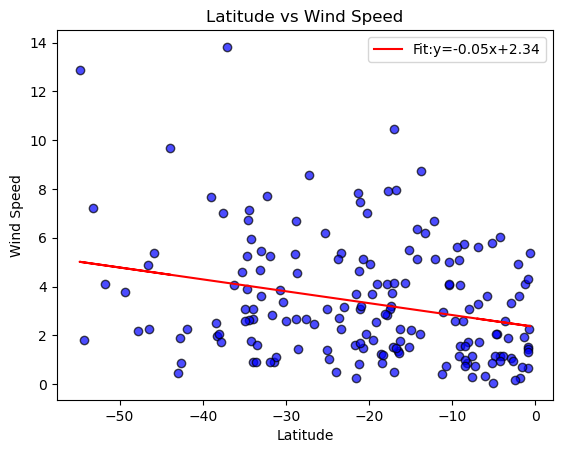

The r^2 value is -0.2688130113832434


In [44]:
# Southern Hemisphere
create_linear_regression_plot(
    southern_hemi_df['Lat'],
    southern_hemi_df['Wind Speed'],
    'Latitude vs Wind Speed',
    'Latitude',
    'Wind Speed',
    "shemi_wind",
    )

**Discussion about the linear relationship:** There seems to be a closer relationship between lower windspeeds of 5 mph and lower near the equator within the southern hemisphere, where as in the northern hemisphere there is a larger connection of 6 mph and below spread more evening across the latitudal points. Wind can be caused by nature and by man, largely there seems to be more wind in the northern hemisphere of varies degrees, the larger land mass as a whole and landmass could be a cause of this. 